<a href="https://colab.research.google.com/github/iwacooy/machine_learning_pemula/blob/main/submission_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [3]:
import pandas as pd  # Mengimpor pustaka pandas untuk manipulasi dan analisis data
import matplotlib.pyplot as plt  # Mengimpor pustaka matplotlib untuk visualisasi grafik
from yellowbrick.cluster import KElbowVisualizer  # Mengimpor KElbowVisualizer untuk visualisasi metode Elbow

from sklearn.cluster import KMeans, DBSCAN  # Mengimpor algoritma KMeans dan DBSCAN untuk clustering
from sklearn.metrics import silhouette_score  # Mengimpor silhouette_score untuk mengevaluasi hasil clustering

import seaborn as sns
import numpy as np

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_percentage_error

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [4]:
df = pd.read_csv('laptop_prices.csv')
df.head()

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($)
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,3997.07
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,1355.78
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS,2673.07
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows,751.17
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux,2059.83


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## 1. Memahami Struktur Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11768 entries, 0 to 11767
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 11768 non-null  object 
 1   Processor             11768 non-null  object 
 2   RAM (GB)              11768 non-null  int64  
 3   Storage               11768 non-null  object 
 4   GPU                   11768 non-null  object 
 5   Screen Size (inch)    11768 non-null  float64
 6   Resolution            11768 non-null  object 
 7   Battery Life (hours)  11768 non-null  float64
 8   Weight (kg)           11768 non-null  float64
 9   Operating System      11768 non-null  object 
 10  Price ($)             11768 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 1011.4+ KB


In [6]:
num_features = df.select_dtypes(include=['number']).columns
cat_features = df.select_dtypes(include=['object']).columns

## 2.Menangani Data yang Hilang

In [7]:
df.isnull().sum()

,0
Brand,0
Processor,0
RAM (GB),0
Storage,0
GPU,0
Screen Size (inch),0
Resolution,0
Battery Life (hours),0
Weight (kg),0
Operating System,0


## 3. Analisis Distribusi dan Korelasi

In [8]:
df.describe(include='all')

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($)
count,11768,11768,11768.000000,11768,11768,11768.000000,11768,11768.000000,11768.000000,11768,11768.000000
unique,10,8,NaN,5,7,NaN,4,NaN,NaN,4,NaN
top,Apple,Intel i3,NaN,512GB SSD,Nvidia RTX 2060,NaN,3840x2160,NaN,NaN,Windows,NaN
freq,1262,1570,NaN,2420,1746,NaN,2977,NaN,NaN,2954,NaN
mean,NaN,NaN,24.852821,NaN,NaN,15.212305,NaN,8.027855,2.341117,NaN,2183.571608
std,NaN,NaN,21.762567,NaN,NaN,1.436997,NaN,2.305400,0.667921,NaN,1316.886132
min,NaN,NaN,4.000000,NaN,NaN,13.300000,NaN,4.000000,1.200000,NaN,279.570000
25%,NaN,NaN,8.000000,NaN,NaN,14.000000,NaN,6.000000,1.760000,NaN,1272.045000
50%,NaN,NaN,16.000000,NaN,NaN,15.600000,NaN,8.000000,2.340000,NaN,1840.865000
75%,NaN,NaN,32.000000,NaN,NaN,16.000000,NaN,10.000000,2.910000,NaN,2698.370000


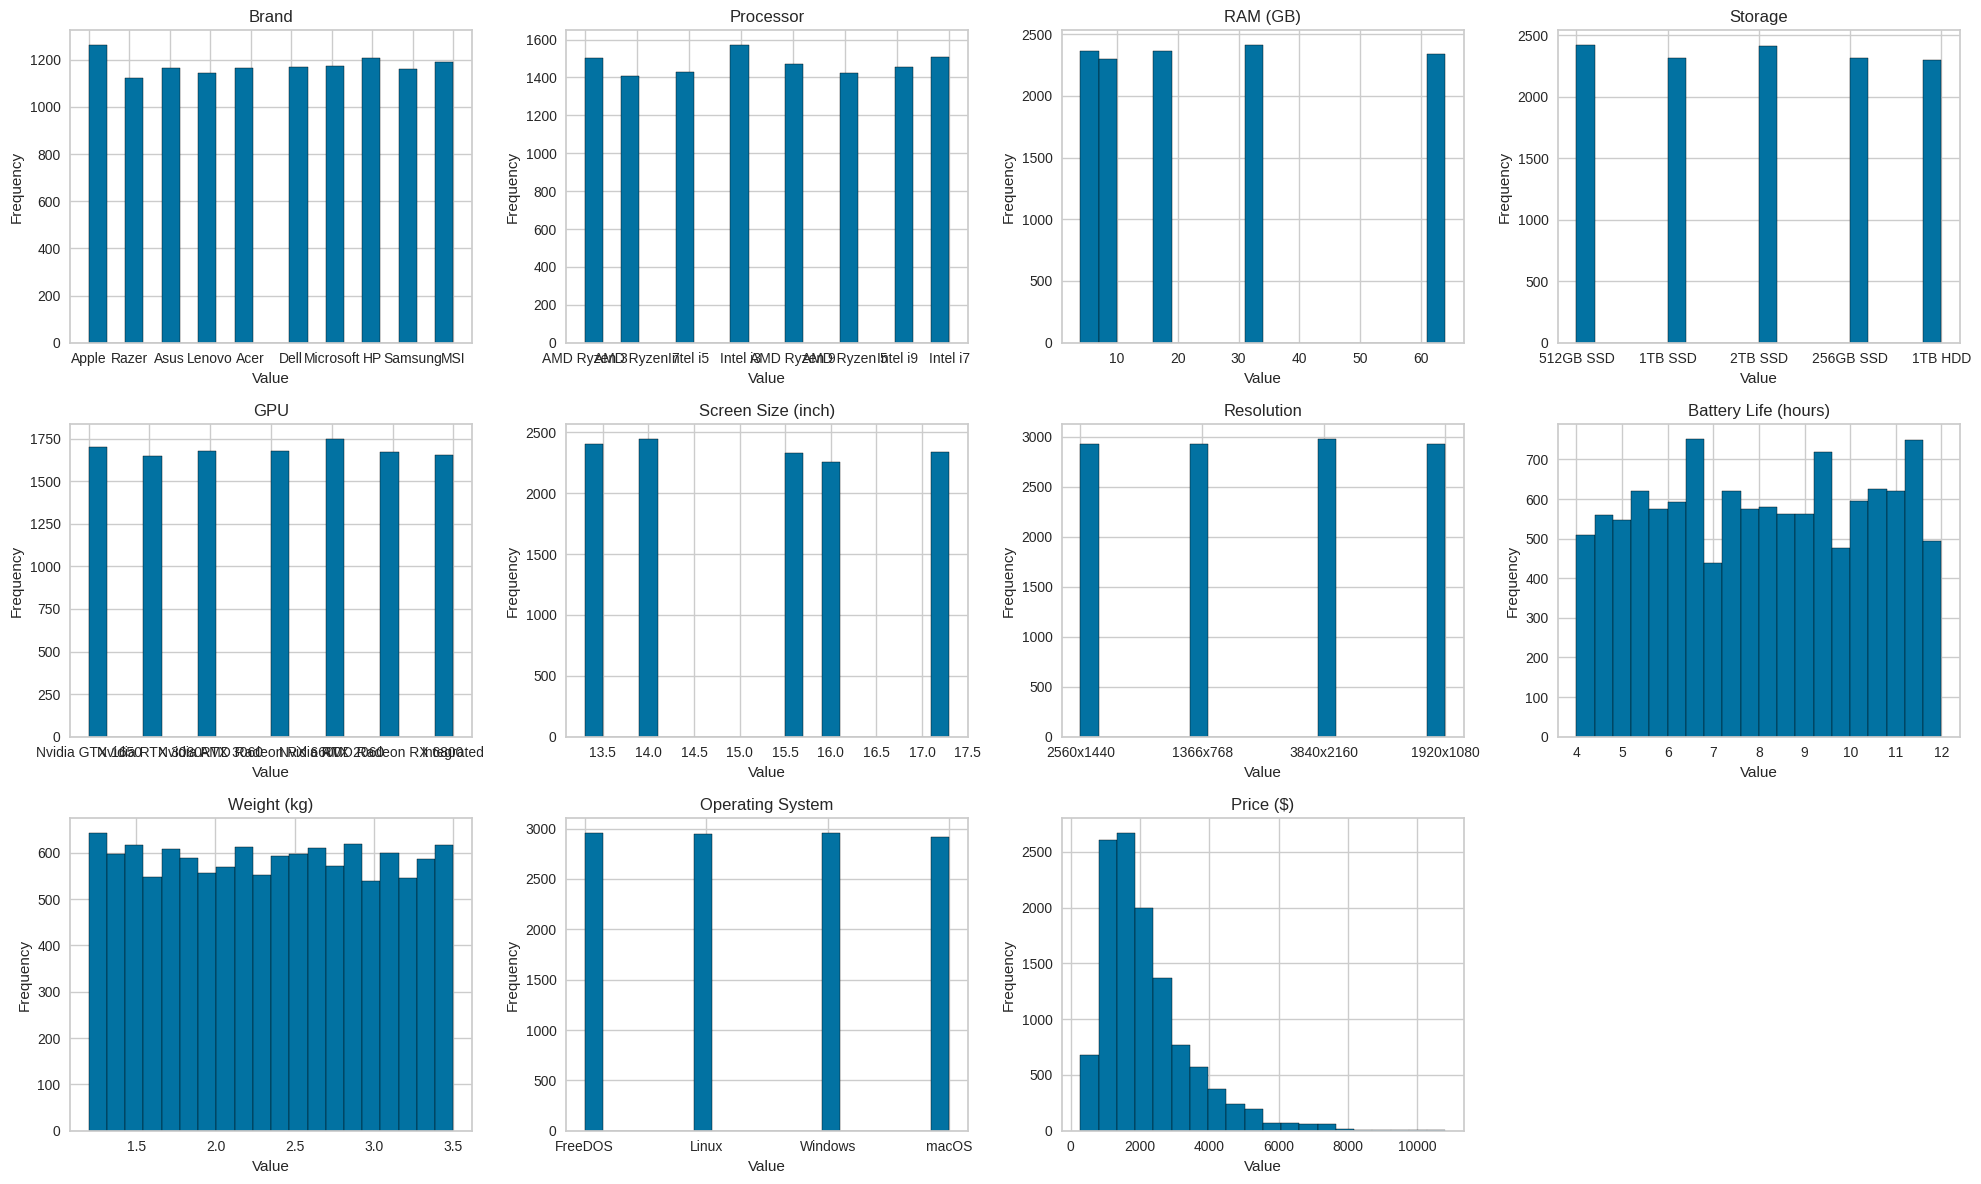

In [7]:
# Menghitung jumlah variabel
num_vars = df.shape[1] # Shape adalah Atribut yang mengembalikan jumlah baris dan kolom dalam bentuk tuple (jumlah_baris[0], jumlah_kolom[1]).

# Menentukan jumlah baris dan kolom untuk grid subplot
n_cols = 4  # Jumlah kolom yang diinginkan (untuk membuat visualisasi data)
n_rows = -(-num_vars // n_cols)  # Ceiling division untuk menentukan jumlah baris ("untuk membuat visualisasi data")

# Membuat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

# Flatten axes array untuk memudahkan iterasi jika diperlukan
axes = axes.flatten()

# Plot setiap variabel
for i, column in enumerate(df.columns): #i adalah sebuah index
    df[column].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Menghapus subplot yang tidak terpakai (jika ada)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Menyesuaikan layout agar lebih rapi
plt.tight_layout()
plt.show()

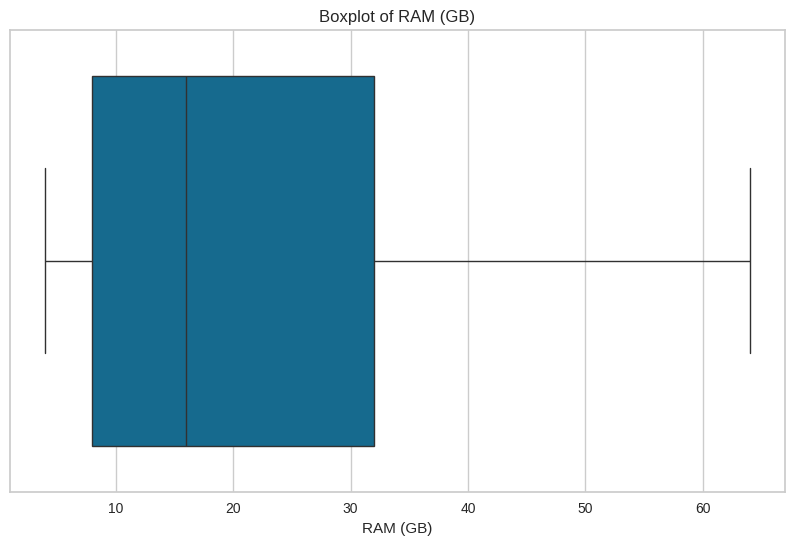

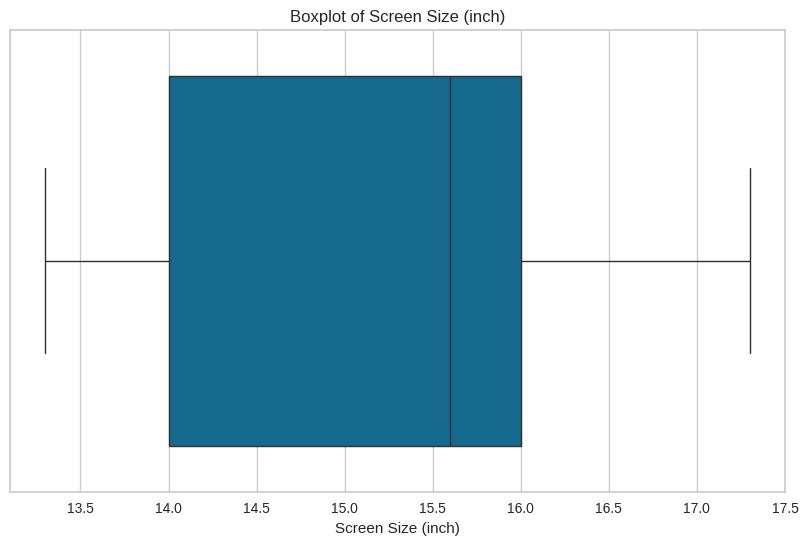

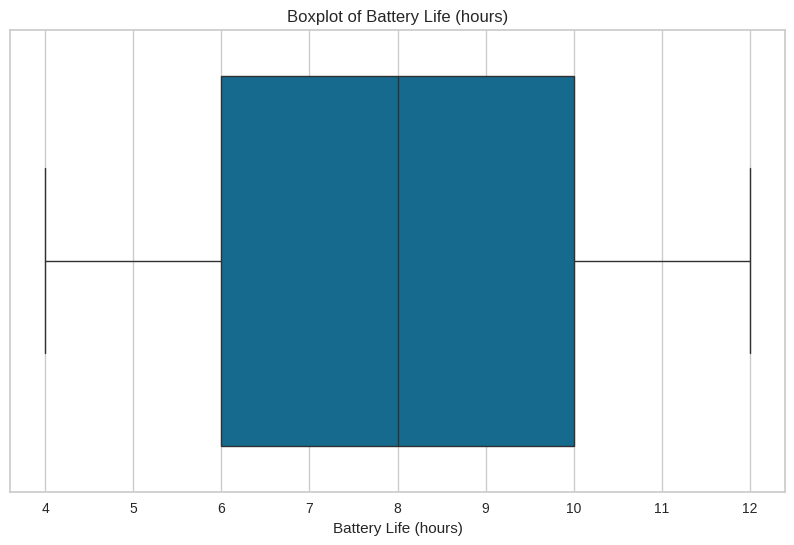

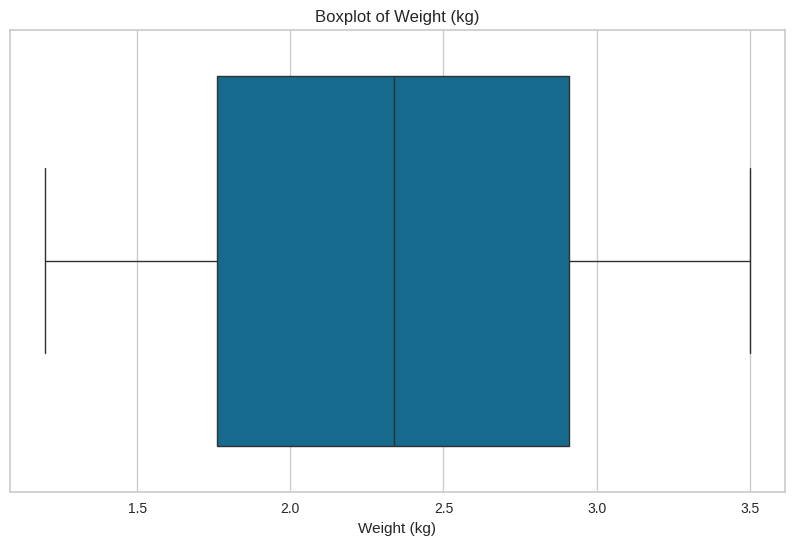

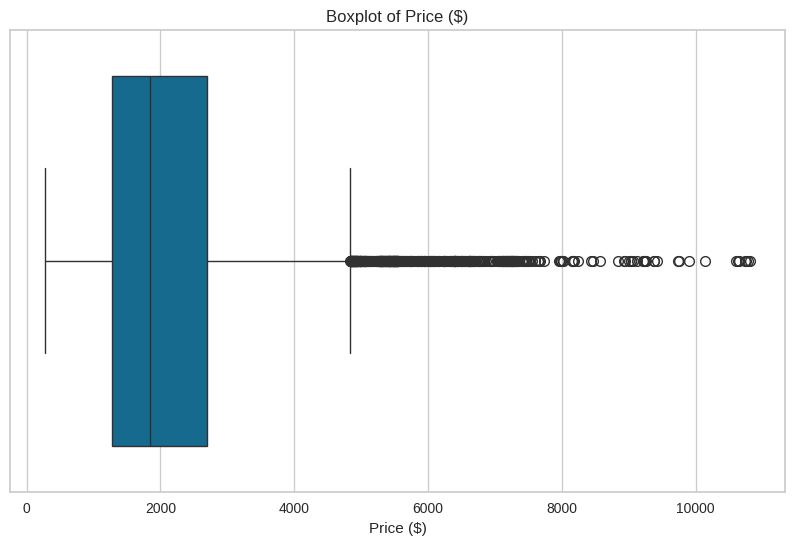

In [ ]:
for features in num_features:
  plt.figure(figsize=(10,6))
  sns.boxplot(x=df[features])
  plt.title(f'Boxplot of {features}')
  plt.show

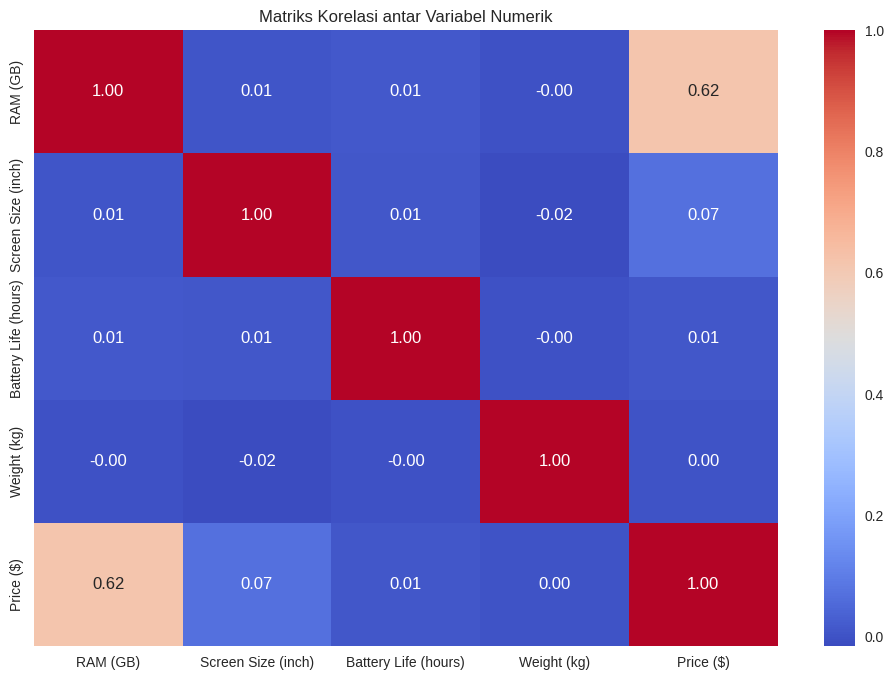

In [ ]:
# Matriks Korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriks Korelasi antar Variabel Numerik")
plt.show()

## 4. Visualisasi Data

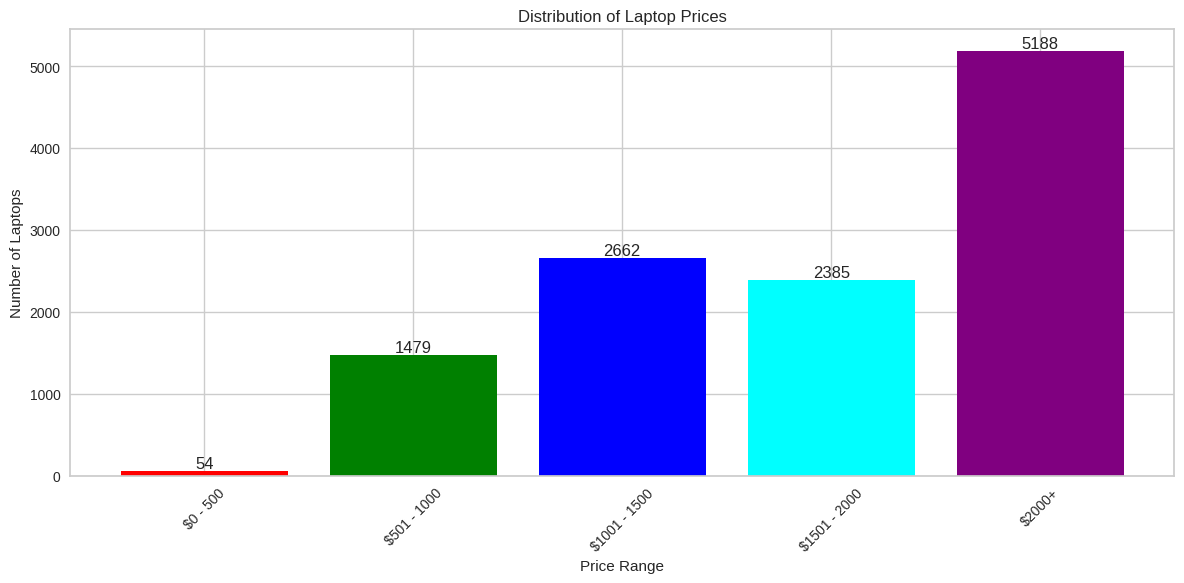

In [ ]:
# Mengelompokkan harga laptop ke dalam kategori harga dan menghitung jumlah laptop di setiap kategori
p0_500 = df["Price ($)"][(df["Price ($)"] >= 0) & (df["Price ($)"] <= 500)]
p501_1000 = df["Price ($)"][(df["Price ($)"] > 500) & (df["Price ($)"] <= 1000)]
p1001_1500 = df["Price ($)"][(df["Price ($)"] > 1000) & (df["Price ($)"] <= 1500)]
p1501_2000 = df["Price ($)"][(df["Price ($)"] > 1500) & (df["Price ($)"] <= 2000)]
p2000up = df["Price ($)"][df["Price ($)"] > 2000]

# Menyusun data untuk plotting
price_labels = ["$0 - 500", "$501 - 1000", "$1001 - 1500", "$1501 - 2000", "$2000+"]
price_counts = [len(p0_500.values), len(p501_1000.values), len(p1001_1500.values), len(p1501_2000.values), len(p2000up.values)]

# Membuat bar chart untuk distribusi harga laptop
plt.figure(figsize=(12, 6))
plt.bar(price_labels, price_counts, color=['red', 'green', 'blue', 'cyan', 'purple'])
plt.title("Distribution of Laptop Prices")
plt.xlabel("Price Range")
plt.ylabel("Number of Laptops")
plt.xticks(rotation=45)

# Menambahkan label jumlah di atas setiap bar
for i in range(len(price_labels)):
    plt.text(i, price_counts[i], price_counts[i], ha='center', va='bottom')

plt.tight_layout()
plt.show()


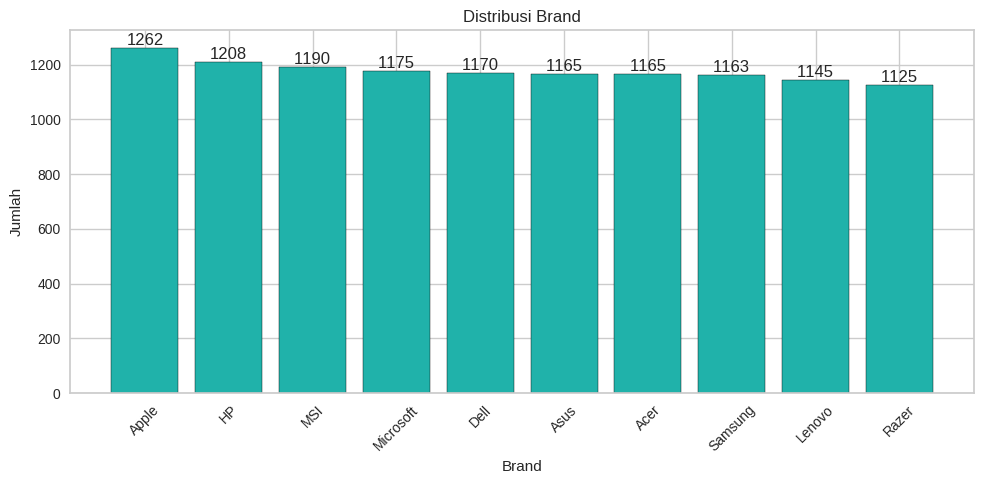

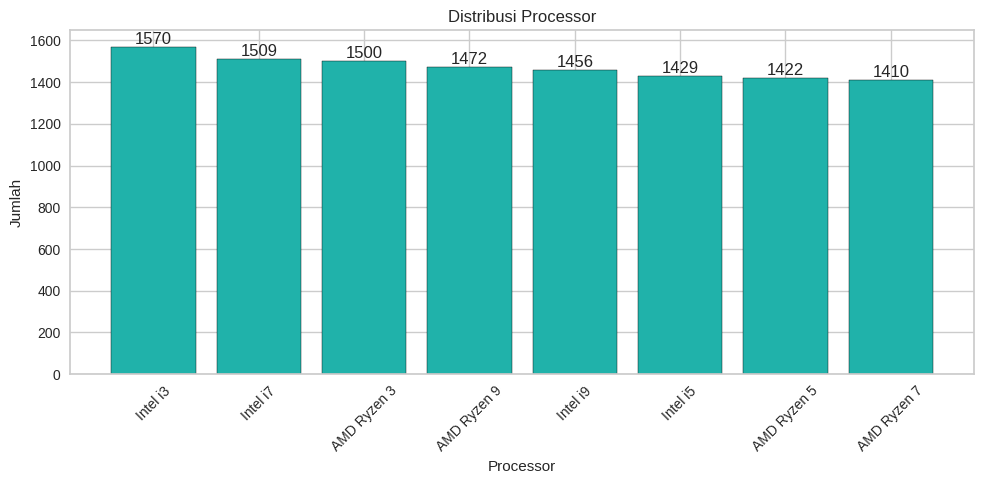

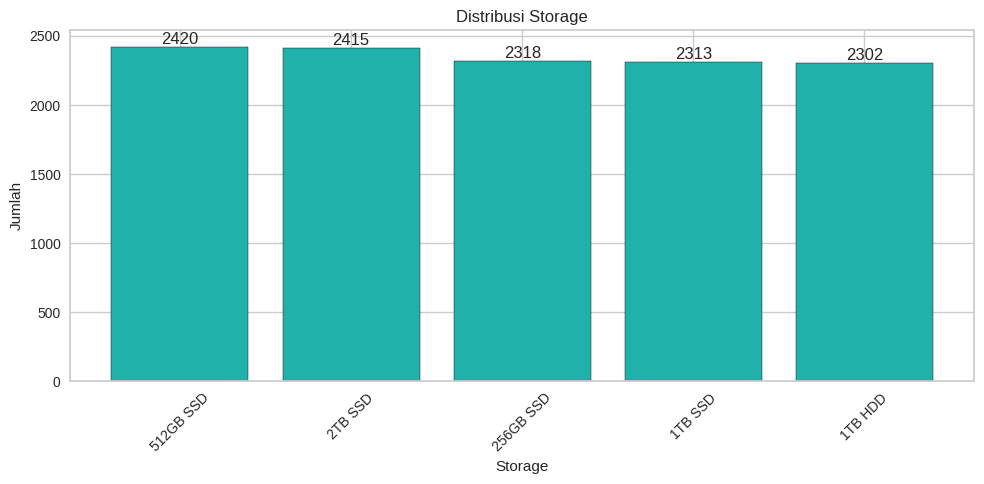

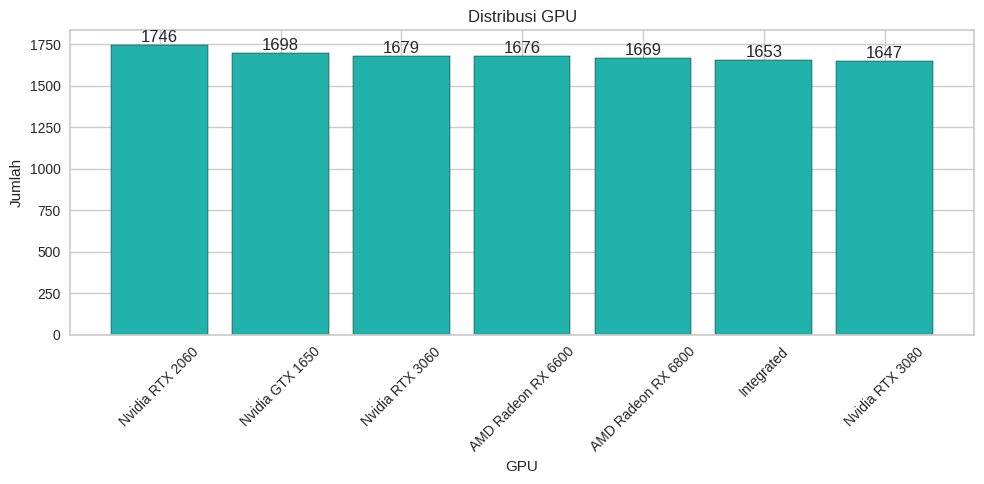

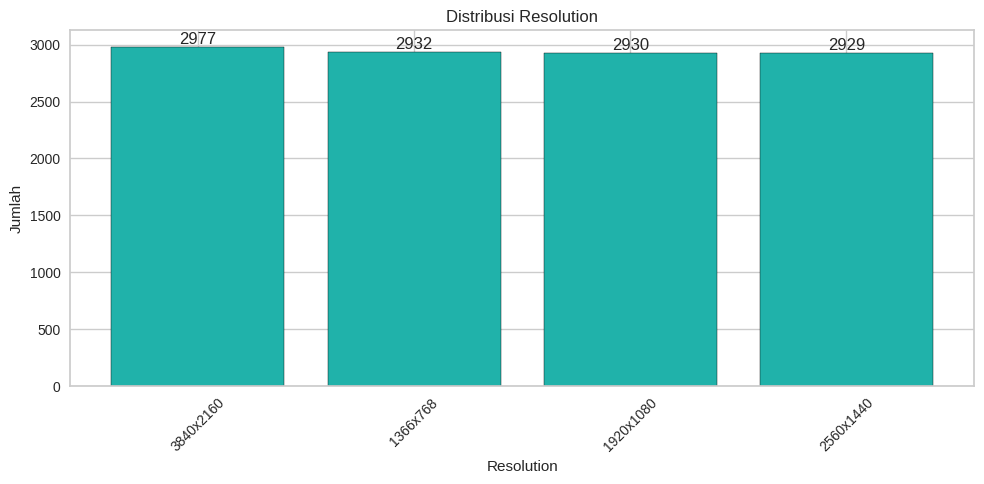

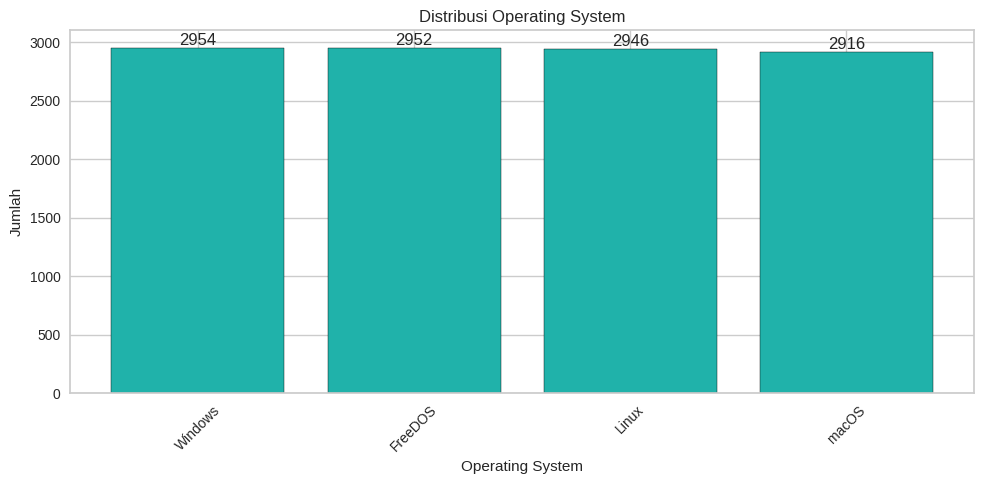

In [ ]:


# Loop untuk membuat bar chart masing-masing kolom
for col in cat_features:
    plt.figure(figsize=(10, 5))
    value_counts = df[col].value_counts()

    # Bar chart
    plt.bar(value_counts.index, value_counts.values, color='lightseagreen', edgecolor='black')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45)

    # Menampilkan label di atas setiap bar
    for i in range(len(value_counts)):
        plt.text(i, value_counts.values[i], value_counts.values[i], ha='center', va='bottom')

    plt.tight_layout()
    plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

## 1. Menghapus atau Menangani Data Kosong (Missing Values)

In [9]:
df.isnull().sum()

,0
Brand,0
Processor,0
RAM (GB),0
Storage,0
GPU,0
Screen Size (inch),0
Resolution,0
Battery Life (hours),0
Weight (kg),0
Operating System,0


## 2. Menghapus Data Duplikat

In [4]:
df.duplicated().sum()

0

## 3. Deteksi dan Penanganan Outlier

Disini data terlihat normal dan tidak ada outliers, terjadi Right Skewed pada Price ($) tetapi ini normal pada harga laptop.

Jadi Penanganan Outliers tidak diperlukan

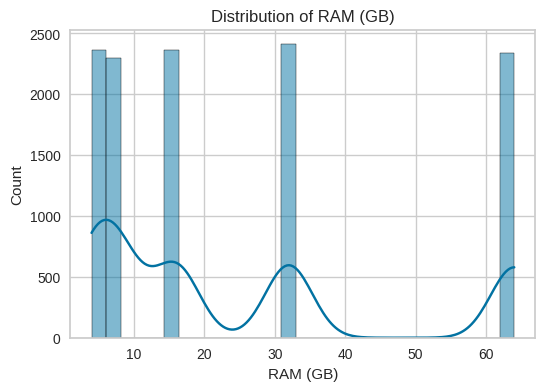

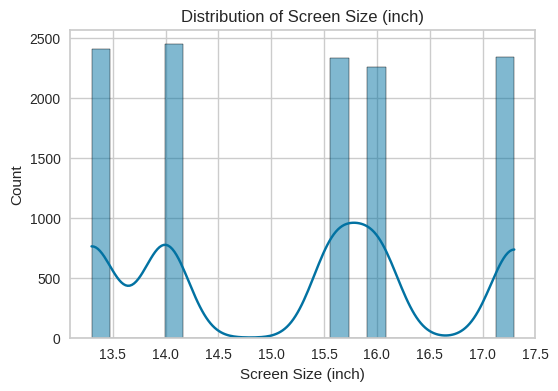

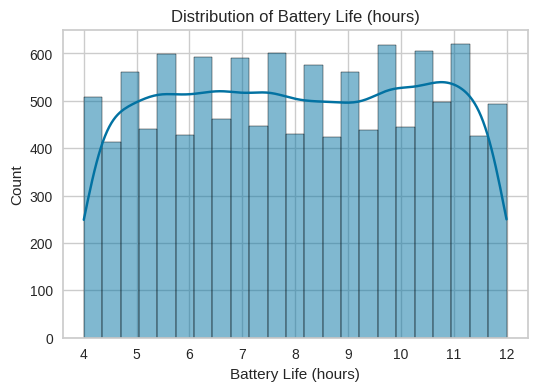

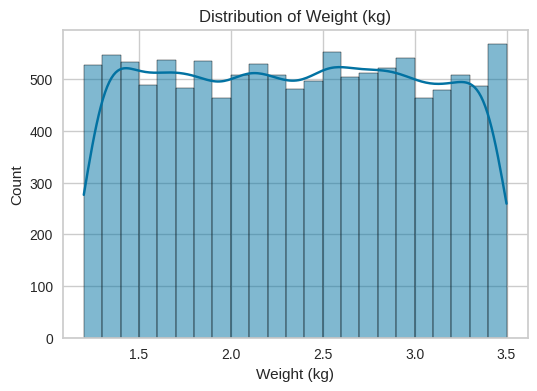

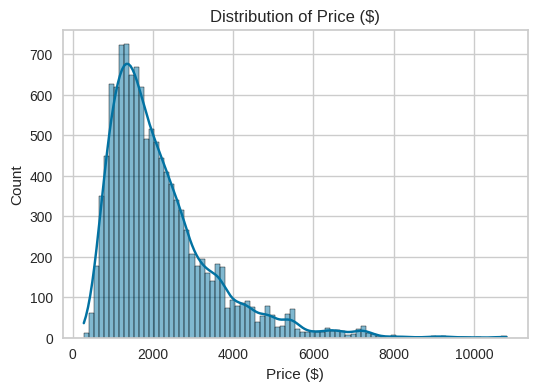

In [14]:
for col in num_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


In [15]:
for col in num_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    print(f"Kolom {col} punya {len(outliers)} outlier")


Kolom RAM (GB) punya 0 outlier
Kolom Screen Size (inch) punya 0 outlier
Kolom Battery Life (hours) punya 0 outlier
Kolom Weight (kg) punya 0 outlier
Kolom Price ($) punya 605 outlier


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11768 entries, 0 to 11767
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 11768 non-null  object 
 1   Processor             11768 non-null  object 
 2   RAM (GB)              11768 non-null  int64  
 3   Storage               11768 non-null  object 
 4   GPU                   11768 non-null  object 
 5   Screen Size (inch)    11768 non-null  float64
 6   Resolution            11768 non-null  object 
 7   Battery Life (hours)  11768 non-null  float64
 8   Weight (kg)           11768 non-null  float64
 9   Operating System      11768 non-null  object 
 10  Price ($)             11768 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 1011.4+ KB


## 4. Encoding Data Kategorikal

In [10]:
# Salin df asli agar tidak berubah
df_encoded = df.copy()

# Lanjutkan proses encoding di df_encoded saja
ohe = OneHotEncoder(sparse_output=False)

# Transform data kategorikal
ohe_temp = ohe.fit_transform(df_encoded[cat_features])

# Buat dataframe hasil encoding, pastikan index disamakan
df_ohe = pd.DataFrame(ohe_temp, columns=ohe.get_feature_names_out(cat_features), index=df_encoded.index)

# Gabungkan hasil encoding ke df_encoded
df_encoded = pd.concat([df_encoded, df_ohe], axis=1)

# Hapus kolom kategorikal asli dari df_encoded
df_encoded.drop(columns=cat_features, inplace=True)

# Tampilkan hasil df_encoded
df_encoded.head()


,RAM (GB),Screen Size (inch),Battery Life (hours),Weight (kg),Price ($),Brand_Acer,Brand_Apple,Brand_Asus,Brand_Dell,Brand_HP,...,GPU_Nvidia RTX 3060,GPU_Nvidia RTX 3080,Resolution_1366x768,Resolution_1920x1080,Resolution_2560x1440,Resolution_3840x2160,Operating System_FreeDOS,Operating System_Linux,Operating System_Windows,Operating System_macOS
0,64,17.3,8.9,1.42,3997.07,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,4,14.0,9.4,2.57,1355.78,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,32,13.3,8.5,1.74,2673.07,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,4,13.3,10.5,3.10,751.17,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,16.0,5.7,3.38,2059.83,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [11]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11768 entries, 0 to 11767
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   RAM (GB)                  11768 non-null  int64  
 1   Screen Size (inch)        11768 non-null  float64
 2   Battery Life (hours)      11768 non-null  float64
 3   Weight (kg)               11768 non-null  float64
 4   Price ($)                 11768 non-null  float64
 5   Brand_Acer                11768 non-null  float64
 6   Brand_Apple               11768 non-null  float64
 7   Brand_Asus                11768 non-null  float64
 8   Brand_Dell                11768 non-null  float64
 9   Brand_HP                  11768 non-null  float64
 10  Brand_Lenovo              11768 non-null  float64
 11  Brand_MSI                 11768 non-null  float64
 12  Brand_Microsoft           11768 non-null  float64
 13  Brand_Razer               11768 non-null  float64
 14  Brand_

## 5. Normalisasi atau Standarisasi Fitur

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

## 1. Pilih algoritma clustering (K-Means)

In [12]:
X = df_encoded[['RAM (GB)', 'Screen Size (inch)', 'Price ($)']]

print(pd.DataFrame(X, columns=['RAM (GB)', 'Screen Size (inch)', 'Price ($)']))
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()


       RAM (GB)  Screen Size (inch)  Price ($)
0            64                17.3    3997.07
1             4                14.0    1355.78
2            32                13.3    2673.07
3             4                13.3     751.17
4             4                16.0    2059.83
...         ...                 ...        ...
11763         4                17.3     704.82
11764         4                16.0     775.59
11765         4                15.6    2789.46
11766        16                13.3    1067.13
11767         8                17.3    1579.55

[11768 rows x 3 columns]


## 2. Latih model

In [13]:
numerik_features = ['RAM (GB)', 'Screen Size (inch)', 'Battery Life (hours)', 'Weight (kg)', 'Price ($)']
# Training model clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# Tambahkan label cluster ke dataset
df_encoded['Cluster'] = labels

# Analisis karakteristik per cluster (optional)
cluster_means = df_encoded.groupby('Cluster')[numerik_features].mean()
print("\nRata-rata fitur numerik per cluster:")
print(cluster_means)


Rata-rata fitur numerik per cluster:
          RAM (GB)  Screen Size (inch)  Battery Life (hours)  Weight (kg)  \
Cluster                                                                     
0        34.605149           15.301963              8.051976     2.335842   
1        54.427586           15.374778              8.127094     2.361823   
2        14.856223           15.136662              7.999253     2.341069   

           Price ($)  
Cluster               
0        2803.618965  
1        5390.292286  
2        1350.882403  


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

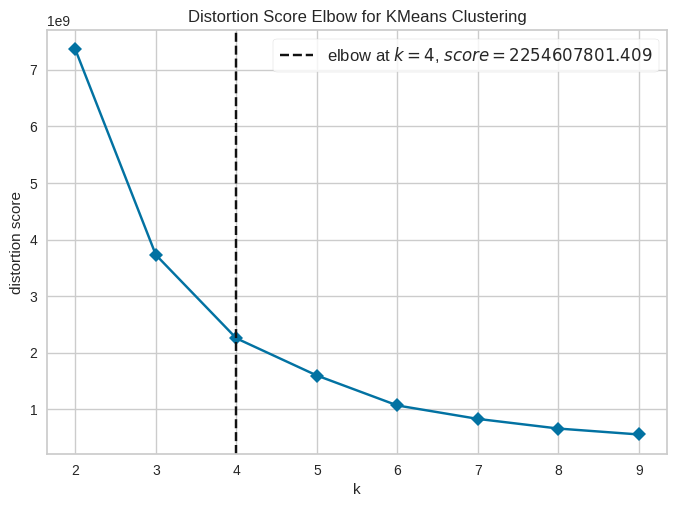

Silhouette Score untuk k=2: 0.6572
Silhouette Score untuk k=3: 0.5877
Silhouette Score untuk k=4: 0.5687
Silhouette Score untuk k=5: 0.5363
Silhouette Score untuk k=6: 0.5396
Silhouette Score untuk k=7: 0.5319
Silhouette Score untuk k=8: 0.5331
Silhouette Score untuk k=9: 0.5233
Silhouette Score untuk k=10: 0.5300


In [14]:

# 1. Elbow Method dengan Visualizer
kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(2, 10), metric='distortion', timings=False)
visualizer.fit(X)
visualizer.show()

# 2. Silhouette Score Manual per jumlah cluster
sil_scores = []
k_range = range(2, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X)
    sil = silhouette_score(X, labels)
    sil_scores.append(sil)
    print(f"Silhouette Score untuk k={k}: {sil:.4f}")

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [15]:
df

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($)
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,3997.07
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,1355.78
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS,2673.07
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows,751.17
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux,2059.83
...,...,...,...,...,...,...,...,...,...,...,...
11763,Acer,Intel i3,4,2TB SSD,Nvidia RTX 2060,17.3,1366x768,11.5,1.58,macOS,704.82
11764,Asus,Intel i3,4,2TB SSD,AMD Radeon RX 6800,16.0,1366x768,9.5,2.14,Linux,775.59
11765,Razer,AMD Ryzen 9,4,2TB SSD,AMD Radeon RX 6600,15.6,2560x1440,8.2,2.05,Linux,2789.46
11766,Samsung,AMD Ryzen 7,16,512GB SSD,Integrated,13.3,1920x1080,7.5,1.48,macOS,1067.13


In [16]:
# Split Resolution data to row & column pixel
df[["Row Pixel", "Column Pixel"]] = df["Resolution"].str.split("x", expand = True)

df.drop("Resolution", axis = 1, inplace = True)

# Change data type from object to number
df["Row Pixel"] = df["Row Pixel"].astype("int")
df["Column Pixel"] = df["Column Pixel"].astype("int")

df.head()

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Battery Life (hours),Weight (kg),Operating System,Price ($),Row Pixel,Column Pixel
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,8.9,1.42,FreeDOS,3997.07,2560,1440
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,9.4,2.57,Linux,1355.78,1366,768
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,8.5,1.74,FreeDOS,2673.07,3840,2160
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,10.5,3.10,Windows,751.17,1366,768
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,5.7,3.38,Linux,2059.83,3840,2160


In [17]:
# Add new feature("PPI")
df["PPI"] = 0
for i in range(len(df)):
    df["PPI"].loc[i] = np.sqrt((df["Row Pixel"].loc[i])**2 + (df["Column Pixel"].loc[i])**2) / df["Screen Size (inch)"].loc[i]
    df["PPI"].loc[i] = df["PPI"].loc[i].round()
df["PPI"] = df["PPI"].astype("int")
df.head()

<ipython-input-17-5ac3295b94a8>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["PPI"].loc[i] = np.sqrt((df["Row Pixel"].loc[i])**2 + (df["Column Pixel"].loc[i])**2) / df["Screen Size (inch)"].loc[i]
<ipython-input-17-5ac3295b94a8>:4: Se

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Battery Life (hours),Weight (kg),Operating System,Price ($),Row Pixel,Column Pixel,PPI
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,8.9,1.42,FreeDOS,3997.07,2560,1440,170
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,9.4,2.57,Linux,1355.78,1366,768,112
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,8.5,1.74,FreeDOS,2673.07,3840,2160,331
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,10.5,3.10,Windows,751.17,1366,768,118
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,5.7,3.38,Linux,2059.83,3840,2160,275


In [18]:
# Split Processor data to GPU Brand & GPU model
df[["Laptop Storage", "Storage Type"]] = df["Storage"].str.split(" ", n=1, expand=True)


df.drop("Storage", axis = 1, inplace = True)
# Mapping ukuran storage ke angka
storage_map = {
    "256GB": 256,
    "512GB": 512,
    "1TB": 1024,
    "2TB": 2048
}

df["Laptop Storage"] = df["Laptop Storage"].map(storage_map).astype(int)

df.head()


,Brand,Processor,RAM (GB),GPU,Screen Size (inch),Battery Life (hours),Weight (kg),Operating System,Price ($),Row Pixel,Column Pixel,PPI,Laptop Storage,Storage Type
0,Apple,AMD Ryzen 3,64,Nvidia GTX 1650,17.3,8.9,1.42,FreeDOS,3997.07,2560,1440,170,512,SSD
1,Razer,AMD Ryzen 7,4,Nvidia RTX 3080,14.0,9.4,2.57,Linux,1355.78,1366,768,112,1024,SSD
2,Asus,Intel i5,32,Nvidia RTX 3060,13.3,8.5,1.74,FreeDOS,2673.07,3840,2160,331,2048,SSD
3,Lenovo,Intel i5,4,Nvidia RTX 3080,13.3,10.5,3.10,Windows,751.17,1366,768,118,256,SSD
4,Razer,Intel i3,4,AMD Radeon RX 6600,16.0,5.7,3.38,Linux,2059.83,3840,2160,275,256,SSD


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11768 entries, 0 to 11767
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 11768 non-null  object 
 1   Processor             11768 non-null  object 
 2   RAM (GB)              11768 non-null  int64  
 3   GPU                   11768 non-null  object 
 4   Screen Size (inch)    11768 non-null  float64
 5   Battery Life (hours)  11768 non-null  float64
 6   Weight (kg)           11768 non-null  float64
 7   Operating System      11768 non-null  object 
 8   Price ($)             11768 non-null  float64
 9   Row Pixel             11768 non-null  int64  
 10  Column Pixel          11768 non-null  int64  
 11  PPI                   11768 non-null  int64  
 12  Laptop Storage        11768 non-null  int64  
 13  Storage Type          11768 non-null  object 
dtypes: float64(4), int64(5), object(5)
memory usage: 1.3+ MB


In [20]:
# OneHotEncode fitur kategorikal
ohe = OneHotEncoder(sparse_output=False)
categorical_cols = ["Storage Type"]
ohe_array = ohe.fit_transform(df[categorical_cols])

# Buat DataFrame hasil OneHotEncoder
ohe_df = pd.DataFrame(ohe_array, columns=ohe.get_feature_names_out(categorical_cols), index=df.index)

# Gabungkan ke DataFrame utama
df = pd.concat([df, ohe_df], axis=1)

In [21]:
df.drop(["Storage Type"], axis = 1, inplace = True)
df.head()

,Brand,Processor,RAM (GB),GPU,Screen Size (inch),Battery Life (hours),Weight (kg),Operating System,Price ($),Row Pixel,Column Pixel,PPI,Laptop Storage,Storage Type_HDD,Storage Type_SSD
0,Apple,AMD Ryzen 3,64,Nvidia GTX 1650,17.3,8.9,1.42,FreeDOS,3997.07,2560,1440,170,512,0.0,1.0
1,Razer,AMD Ryzen 7,4,Nvidia RTX 3080,14.0,9.4,2.57,Linux,1355.78,1366,768,112,1024,0.0,1.0
2,Asus,Intel i5,32,Nvidia RTX 3060,13.3,8.5,1.74,FreeDOS,2673.07,3840,2160,331,2048,0.0,1.0
3,Lenovo,Intel i5,4,Nvidia RTX 3080,13.3,10.5,3.10,Windows,751.17,1366,768,118,256,0.0,1.0
4,Razer,Intel i3,4,AMD Radeon RX 6600,16.0,5.7,3.38,Linux,2059.83,3840,2160,275,256,0.0,1.0


In [22]:
# Relocate target("Price ($)") to end column
df1 = df.copy()
df.drop(["Price ($)"], axis = 1, inplace = True)
df = pd.concat([df, df1["Price ($)"]], axis = 1)
df1

,Brand,Processor,RAM (GB),GPU,Screen Size (inch),Battery Life (hours),Weight (kg),Operating System,Price ($),Row Pixel,Column Pixel,PPI,Laptop Storage,Storage Type_HDD,Storage Type_SSD
0,Apple,AMD Ryzen 3,64,Nvidia GTX 1650,17.3,8.9,1.42,FreeDOS,3997.07,2560,1440,170,512,0.0,1.0
1,Razer,AMD Ryzen 7,4,Nvidia RTX 3080,14.0,9.4,2.57,Linux,1355.78,1366,768,112,1024,0.0,1.0
2,Asus,Intel i5,32,Nvidia RTX 3060,13.3,8.5,1.74,FreeDOS,2673.07,3840,2160,331,2048,0.0,1.0
3,Lenovo,Intel i5,4,Nvidia RTX 3080,13.3,10.5,3.10,Windows,751.17,1366,768,118,256,0.0,1.0
4,Razer,Intel i3,4,AMD Radeon RX 6600,16.0,5.7,3.38,Linux,2059.83,3840,2160,275,256,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11763,Acer,Intel i3,4,Nvidia RTX 2060,17.3,11.5,1.58,macOS,704.82,1366,768,91,2048,0.0,1.0
11764,Asus,Intel i3,4,AMD Radeon RX 6800,16.0,9.5,2.14,Linux,775.59,1366,768,98,2048,0.0,1.0
11765,Razer,AMD Ryzen 9,4,AMD Radeon RX 6600,15.6,8.2,2.05,Linux,2789.46,2560,1440,188,2048,0.0,1.0
11766,Samsung,AMD Ryzen 7,16,Integrated,13.3,7.5,1.48,macOS,1067.13,1920,1080,166,512,0.0,1.0


## Build ML Model

In [23]:
df1.head()

,Brand,Processor,RAM (GB),GPU,Screen Size (inch),Battery Life (hours),Weight (kg),Operating System,Price ($),Row Pixel,Column Pixel,PPI,Laptop Storage,Storage Type_HDD,Storage Type_SSD
0,Apple,AMD Ryzen 3,64,Nvidia GTX 1650,17.3,8.9,1.42,FreeDOS,3997.07,2560,1440,170,512,0.0,1.0
1,Razer,AMD Ryzen 7,4,Nvidia RTX 3080,14.0,9.4,2.57,Linux,1355.78,1366,768,112,1024,0.0,1.0
2,Asus,Intel i5,32,Nvidia RTX 3060,13.3,8.5,1.74,FreeDOS,2673.07,3840,2160,331,2048,0.0,1.0
3,Lenovo,Intel i5,4,Nvidia RTX 3080,13.3,10.5,3.10,Windows,751.17,1366,768,118,256,0.0,1.0
4,Razer,Intel i3,4,AMD Radeon RX 6600,16.0,5.7,3.38,Linux,2059.83,3840,2160,275,256,0.0,1.0


In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11768 entries, 0 to 11767
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 11768 non-null  object 
 1   Processor             11768 non-null  object 
 2   RAM (GB)              11768 non-null  int64  
 3   GPU                   11768 non-null  object 
 4   Screen Size (inch)    11768 non-null  float64
 5   Battery Life (hours)  11768 non-null  float64
 6   Weight (kg)           11768 non-null  float64
 7   Operating System      11768 non-null  object 
 8   Price ($)             11768 non-null  float64
 9   Row Pixel             11768 non-null  int64  
 10  Column Pixel          11768 non-null  int64  
 11  PPI                   11768 non-null  int64  
 12  Laptop Storage        11768 non-null  int64  
 13  Storage Type_HDD      11768 non-null  float64
 14  Storage Type_SSD      11768 non-null  float64
dtypes: float64(6), int6

In [25]:
#X = df1[['RAM (GB)', 'Laptop Storage', 'Storage Type_HDD', 'Storage Type_SSD']].values
#print(pd.DataFrame(X, columns=['RAM (GB)', 'Laptop Storage', 'Storage Type_HDD', 'Storage Type_SSD']))
#X = df1[['Performance_Score', 'Price_per_Performance', 'Price ($)', 'Row Pixel', 'Column Pixel', 'PPI', 'GPU_Score',	'Processor_Score']].values
#print(pd.DataFrame(X, columns=['Performance_Score', 'Price_per_Performance', 'Price ($)', 'Row Pixel', 'Column Pixel', 'PPI', 'GPU_Score',	'Processor_Score']))

X = df1[['RAM (GB)', 'Storage Type_HDD', 'Storage Type_SSD', 'Laptop Storage', 'PPI']]
print(pd.DataFrame(X, columns=['RAM (GB)',  'Storage Type_HDD', 'Storage Type_SSD', 'Laptop Storage', 'PPI']))



       RAM (GB)  Storage Type_HDD  Storage Type_SSD  Laptop Storage  PPI
0            64               0.0               1.0             512  170
1             4               0.0               1.0            1024  112
2            32               0.0               1.0            2048  331
3             4               0.0               1.0             256  118
4             4               0.0               1.0             256  275
...         ...               ...               ...             ...  ...
11763         4               0.0               1.0            2048   91
11764         4               0.0               1.0            2048   98
11765         4               0.0               1.0            2048  188
11766        16               0.0               1.0             512  166
11767         8               0.0               1.0             256  170

[11768 rows x 5 columns]


In [26]:
X

,RAM (GB),Storage Type_HDD,Storage Type_SSD,Laptop Storage,PPI
0,64,0.0,1.0,512,170
1,4,0.0,1.0,1024,112
2,32,0.0,1.0,2048,331
3,4,0.0,1.0,256,118
4,4,0.0,1.0,256,275
...,...,...,...,...,...
11763,4,0.0,1.0,2048,91
11764,4,0.0,1.0,2048,98
11765,4,0.0,1.0,2048,188
11766,16,0.0,1.0,512,166


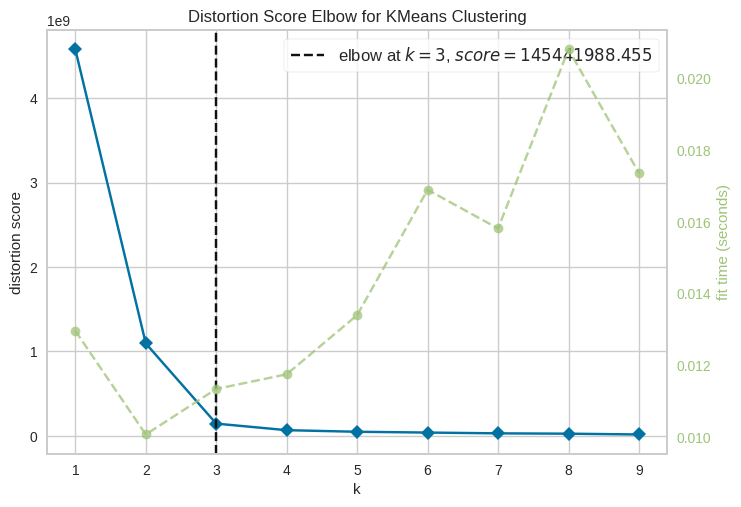

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [43]:
# 7. Training model clustering (misal hasil elbow optimal = 3)
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# 8. Evaluasi hasil clustering
sil_score = silhouette_score(X, labels)
print(f"Silhouette Score: {sil_score:.4f}")

# 9. Tambahkan label cluster ke dataset
df1['Cluster'] = labels

# 10. Analisis karakteristik per cluster (optional)
cluster_means = df1.groupby('Cluster')[numerik_features].mean()
print("\nRata-rata fitur numerik per cluster:")
print(cluster_means)

Silhouette Score: 0.8091

Rata-rata fitur numerik per cluster:
          RAM (GB)  Screen Size (inch)  Battery Life (hours)  Weight (kg)  \
Cluster                                                                     
0        25.262136           15.217750              8.030984     2.347699   
1        23.204969           15.227909              7.974948     2.343445   
2        25.294908           15.198548              8.052329     2.333140   

           Price ($)  
Cluster               
0        2251.971767  
1        2209.042145  
2        2100.019863  


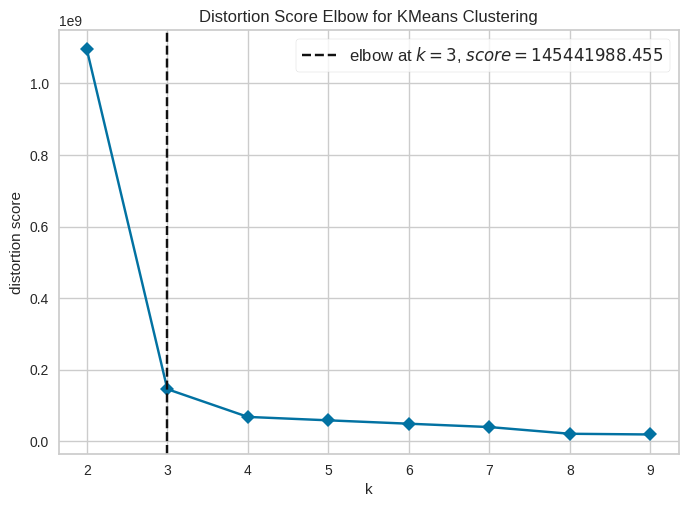

Silhouette Score untuk k=2: 0.7457
Silhouette Score untuk k=3: 0.8091
Silhouette Score untuk k=4: 0.7845
Silhouette Score untuk k=5: 0.7600
Silhouette Score untuk k=6: 0.6929
Silhouette Score untuk k=7: 0.6811
Silhouette Score untuk k=8: 0.5912
Silhouette Score untuk k=9: 0.5765
Silhouette Score untuk k=10: 0.5414


In [29]:

# 1. Elbow Method dengan Visualizer
kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(2, 10), metric='distortion', timings=False)
visualizer.fit(X)
visualizer.show()

# 2. Silhouette Score Manual per jumlah cluster
sil_scores = []
k_range = range(2, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X)
    sil = silhouette_score(X, labels)
    sil_scores.append(sil)
    print(f"Silhouette Score untuk k={k}: {sil:.4f}")

**Silhouette Score Sebelum Feature Selection k=3: 0.6572**

**Silhouette Score Sesudah Feature Selection k=3: 0.8091**

In [30]:
df.head(20)

,Brand,Processor,RAM (GB),GPU,Screen Size (inch),Battery Life (hours),Weight (kg),Operating System,Row Pixel,Column Pixel,PPI,Laptop Storage,Storage Type_HDD,Storage Type_SSD,Price ($)
0,Apple,AMD Ryzen 3,64,Nvidia GTX 1650,17.3,8.9,1.42,FreeDOS,2560,1440,170,512,0.0,1.0,3997.07
1,Razer,AMD Ryzen 7,4,Nvidia RTX 3080,14.0,9.4,2.57,Linux,1366,768,112,1024,0.0,1.0,1355.78
2,Asus,Intel i5,32,Nvidia RTX 3060,13.3,8.5,1.74,FreeDOS,3840,2160,331,2048,0.0,1.0,2673.07
3,Lenovo,Intel i5,4,Nvidia RTX 3080,13.3,10.5,3.10,Windows,1366,768,118,256,0.0,1.0,751.17
4,Razer,Intel i3,4,AMD Radeon RX 6600,16.0,5.7,3.38,Linux,3840,2160,275,256,0.0,1.0,2059.83
5,Acer,AMD Ryzen 3,64,Nvidia RTX 3060,14.0,7.1,1.85,Linux,1366,768,112,2048,0.0,1.0,1676.64
6,Dell,Intel i5,8,Nvidia RTX 2060,15.6,9.1,1.98,Windows,2560,1440,188,1024,0.0,1.0,1449.05
7,Microsoft,AMD Ryzen 9,8,Nvidia RTX 3080,17.3,9.8,1.26,Linux,2560,1440,170,1024,0.0,1.0,2193.55
8,Apple,Intel i5,64,Nvidia RTX 2060,15.6,11.5,1.48,Linux,3840,2160,282,256,0.0,1.0,6409.03
9,HP,AMD Ryzen 5,4,AMD Radeon RX 6800,14.0,7.5,2.19,FreeDOS,3840,2160,315,1024,0.0,1.0,1556.72


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

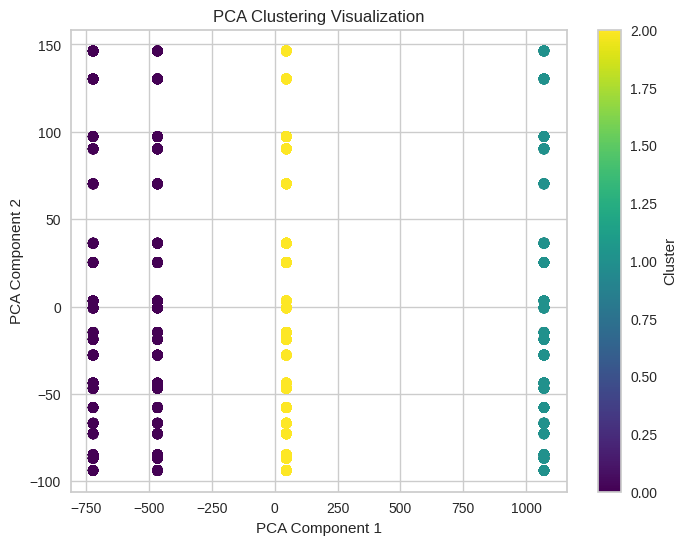

In [45]:
from sklearn.decomposition import PCA
# PCA untuk reduksi dimensi ke 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='viridis', s=50)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Clustering Visualization')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [31]:
df2 = df1.copy()

In [32]:
df2.head()

,Brand,Processor,RAM (GB),GPU,Screen Size (inch),Battery Life (hours),Weight (kg),Operating System,Price ($),Row Pixel,Column Pixel,PPI,Laptop Storage,Storage Type_HDD,Storage Type_SSD,Cluster
0,Apple,AMD Ryzen 3,64,Nvidia GTX 1650,17.3,8.9,1.42,FreeDOS,3997.07,2560,1440,170,512,0.0,1.0,0
1,Razer,AMD Ryzen 7,4,Nvidia RTX 3080,14.0,9.4,2.57,Linux,1355.78,1366,768,112,1024,0.0,1.0,2
2,Asus,Intel i5,32,Nvidia RTX 3060,13.3,8.5,1.74,FreeDOS,2673.07,3840,2160,331,2048,0.0,1.0,1
3,Lenovo,Intel i5,4,Nvidia RTX 3080,13.3,10.5,3.10,Windows,751.17,1366,768,118,256,0.0,1.0,0
4,Razer,Intel i3,4,AMD Radeon RX 6600,16.0,5.7,3.38,Linux,2059.83,3840,2160,275,256,0.0,1.0,0


In [33]:
# Lakukan inverse transform dari kolom hasil OneHotEncoder yang asli
categorical_cols = ['Storage Type']

# Lakukan inverse transform
decoded_categorical = ohe.inverse_transform(df2[ohe.get_feature_names_out(categorical_cols)])

# Buat DataFrame hasil decode
decoded_df = pd.DataFrame(decoded_categorical, columns=categorical_cols, index=df2.index)

# Gabungkan hasil decode ke df2
df2 = pd.concat([df2, decoded_df], axis=1)

# (Opsional) Hapus kolom one-hot encoded jika tidak dibutuhkan lagi
df2.drop(columns=ohe.get_feature_names_out(categorical_cols), inplace=True)

In [34]:
df2

,Brand,Processor,RAM (GB),GPU,Screen Size (inch),Battery Life (hours),Weight (kg),Operating System,Price ($),Row Pixel,Column Pixel,PPI,Laptop Storage,Cluster,Storage Type
0,Apple,AMD Ryzen 3,64,Nvidia GTX 1650,17.3,8.9,1.42,FreeDOS,3997.07,2560,1440,170,512,0,SSD
1,Razer,AMD Ryzen 7,4,Nvidia RTX 3080,14.0,9.4,2.57,Linux,1355.78,1366,768,112,1024,2,SSD
2,Asus,Intel i5,32,Nvidia RTX 3060,13.3,8.5,1.74,FreeDOS,2673.07,3840,2160,331,2048,1,SSD
3,Lenovo,Intel i5,4,Nvidia RTX 3080,13.3,10.5,3.10,Windows,751.17,1366,768,118,256,0,SSD
4,Razer,Intel i3,4,AMD Radeon RX 6600,16.0,5.7,3.38,Linux,2059.83,3840,2160,275,256,0,SSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11763,Acer,Intel i3,4,Nvidia RTX 2060,17.3,11.5,1.58,macOS,704.82,1366,768,91,2048,1,SSD
11764,Asus,Intel i3,4,AMD Radeon RX 6800,16.0,9.5,2.14,Linux,775.59,1366,768,98,2048,1,SSD
11765,Razer,AMD Ryzen 9,4,AMD Radeon RX 6600,15.6,8.2,2.05,Linux,2789.46,2560,1440,188,2048,1,SSD
11766,Samsung,AMD Ryzen 7,16,Integrated,13.3,7.5,1.48,macOS,1067.13,1920,1080,166,512,0,SSD


In [35]:
cluster_means = df2.groupby('Cluster')[['RAM (GB)','Laptop Storage', 'PPI', 'Price ($)']].mean()
print(cluster_means)

          RAM (GB)  Laptop Storage         PPI    Price ($)
Cluster                                                    
0        25.262136      386.755593  184.204728  2251.971767
1        23.204969     2048.000000  184.262112  2209.042145
2        25.294908     1024.000000  185.479957  2100.019863


In [38]:
df2.describe()

,RAM (GB),Screen Size (inch),Battery Life (hours),Weight (kg),Price ($),Row Pixel,Column Pixel,PPI,Laptop Storage,Cluster
count,11768.000000,11768.000000,11768.000000,11768.000000,11768.000000,11768.000000,11768.000000,11768.000000,11768.000000,11768.000000
mean,24.852821,15.212305,8.027855,2.341117,2183.571608,2426.974167,1365.079538,184.716604,977.577158,0.989548
std,21.762567,1.436997,2.305400,0.667921,1316.886132,924.137138,519.934429,72.756077,618.992798,0.891482
min,4.000000,13.300000,4.000000,1.200000,279.570000,1366.000000,768.000000,91.000000,256.000000,0.000000
25%,8.000000,14.000000,6.000000,1.760000,1272.045000,1920.000000,1080.000000,127.000000,512.000000,0.000000
50%,16.000000,15.600000,8.000000,2.340000,1840.865000,2560.000000,1440.000000,170.000000,1024.000000,1.000000
75%,32.000000,16.000000,10.000000,2.910000,2698.370000,3840.000000,2160.000000,255.000000,1024.000000,2.000000
max,64.000000,17.300000,12.000000,3.500000,10807.880000,3840.000000,2160.000000,331.000000,2048.000000,2.000000


In [39]:
summary_stats = df2.groupby('Cluster')[['RAM (GB)', 'Laptop Storage', 'PPI', 'Price ($)']].agg(['min', 'max', 'mean'])
print(summary_stats.round(2))


        RAM (GB)            Laptop Storage                PPI               \
             min max   mean            min   max     mean min  max    mean   
Cluster                                                                      
0              4  64  25.26            256   512   386.76  91  331  184.20   
1              4  64  23.20           2048  2048  2048.00  91  331  184.26   
2              4  64  25.29           1024  1024  1024.00  91  331  185.48   

        Price ($)                     
              min       max     mean  
Cluster                               
0          371.21  10807.88  2251.97  
1          332.71  10646.06  2209.04  
2          279.57  10757.56  2100.02  


Cluster 0:
- RAM: 4 - 64 GB, rata-rata 25.26 GB
- Storage: 256 - 512 GB, rata-rata 386.76 GB
- PPI: Rata-rata 184.20 (cukup standar)
- Price: Min $371, Max $10,800, rata-rata $2,251
- **Analisis:**  Cluster ini terdiri dari pengguna dengan kapasitas RAM yang tinggi dan harga laptop yang relatif lebih mahal, tetapi dengan kapasitas penyimpanan yang mumpuni (256–512 GB).Pengguna intensif seperti programmer, data analyst, atau content creator yang membutuhkan performa tinggi,
Namun tidak terlalu memprioritaskan kapasitas penyimpanan.

Cluster 1:
- RAM: 4 - 64 GB, rata-rata 23.20 GB
- Storage: semua 2TB
- PPI: Rata-rata 184.26 (sama seperti Cluster 0)
- PPrice: Min $332, Max $10,646, rata-rata $2,209
- **Analisis:**  Cluster ini mencakup pengguna dengan storage 2TB yang sangat besar, tetapi RAM dan harga tetap rata-rata mirip dengan cluster lain.Cenderung mengutamakan kapasitas penyimpanan, seperti video editor, desainer, atau pengguna yang menyimpan banyak file. Tidak terlalu membutuhkan performa tinggi dari RAM.

Cluster 2:
- RAM: 4 - 64 GB, rata-rata 25.29 GB
- Storage: semua 1TB
- PPI: Rata-rata tertinggi 185.48 (layar lebih tajam)
- Price: Min $279, Max $10,757, rata-rata $2,100 → termurah dari semua cluster
- **Analisis:**  Cluster ini menunjukkan keseimbangan dalam segala aspek: RAM tinggi, Storage besar (1TB), PPI tinggi, serta harga paling efisien (termurah rata-rata). Pengguna umum atau pelajar yang membutuhkan laptop serbaguna.
Mencari value terbaik antara performa, kualitas tampilan, dan harga.

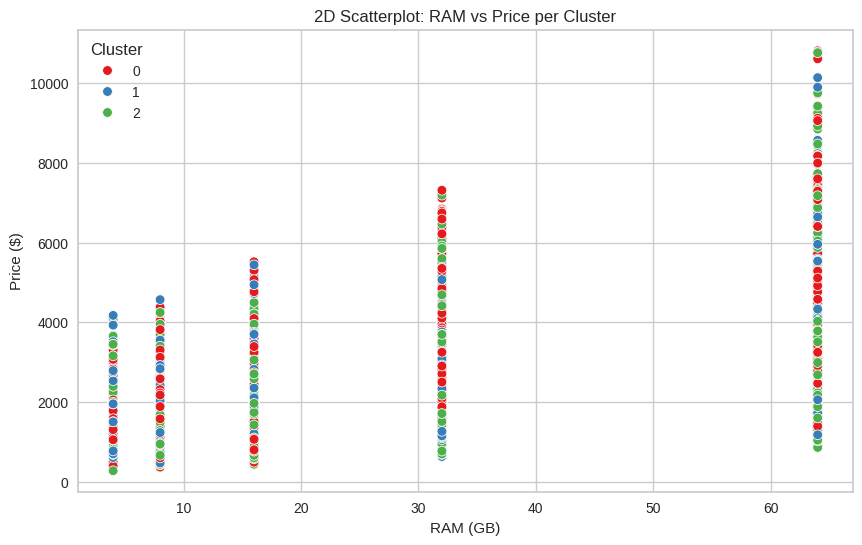

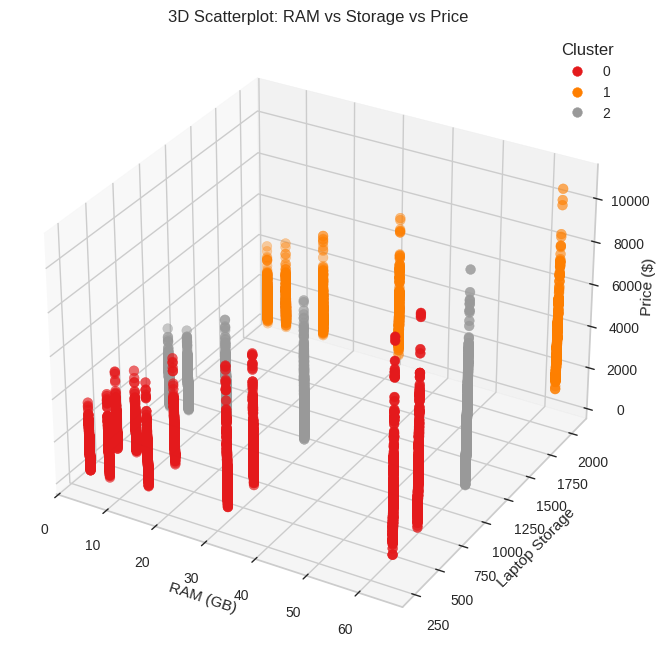

In [42]:
from mpl_toolkits.mplot3d import Axes3D


# 2D Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df2, x='RAM (GB)', y='Price ($)', hue='Cluster', palette='Set1')
plt.title('2D Scatterplot: RAM vs Price per Cluster')
plt.xlabel('RAM (GB)')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()

# 3D Scatterplot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df2['RAM (GB)'], df2['Laptop Storage'], df2['Price ($)'],
                     c=df2['Cluster'], cmap='Set1', s=50)

ax.set_title('3D Scatterplot: RAM vs Storage vs Price')
ax.set_xlabel('RAM (GB)')
ax.set_ylabel('Laptop Storage')
ax.set_zlabel('Price ($)')
plt.legend(*scatter.legend_elements(), title='Cluster')
plt.show()


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [37]:
df2.to_csv("finally_kah_clustering.csv", index=False)


In [45]:
exit()